<a href="https://colab.research.google.com/github/ChacoGolden/DSML_EV/blob/main/Coef_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

In [22]:
# Load your datasets (use your own file paths in Colab)
no2_df = pd.read_csv("https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/No2_emissions_CH.csv")
ev_df = pd.read_csv("https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CH_vehicles_ev_percentage.csv")
swiss_df = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/swiss_final_dataset_1995_2023.csv')
pm10_df = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/PM10_emissions_CH.csv')
co2_df = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CO2_emissions.csv')

In [23]:
# Rename columns for easier access
co2_df.columns = ['year', 'emissions_carburants', 'emissions_combustibles', 'CO2']

# Keep only year and CO2 columns
co2_df = co2_df[['year', 'CO2']]

In [24]:
co2_df.head()

,year,CO2
0,1990,38.858024
1,1991,39.179983
2,1992,40.107216
3,1993,37.872420
4,1994,38.330490


In [25]:
no2_df.head()

,date,NO2 [ug/m3]
0,2000,49.2
1,2001,43.3
2,2002,47.0
3,2003,52.1
4,2004,48.0


In [26]:
swiss_df.head()

,year,population,avg_temp,industry_pct_gdp,Electricity,Fossil
0,1995,7062000,5.20,29.080231,4838.0,4115626.0
1,1996,7081000,4.63,28.028401,4799.0,4167831.0
2,1997,7096000,5.85,27.286719,4858.0,4255487.0
3,1998,7123537,5.46,26.649005,4922.0,4344285.0
4,1999,7164000,5.37,26.281338,5104.0,4465623.0


In [27]:
ev_df.head()

,fuel_type,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Fossil,3.773139e+06,3.876153e+06,3.930170e+06,3.959734e+06,4.029039e+06,4.115626e+06,4.167831e+06,4.255487e+06,4.344285e+06,...,5.863088e+06,5.954218e+06,6.022558e+06,6.077298e+06,6.112385e+06,6.176603e+06,6.242956e+06,6.227307e+06,6.253275e+06,6.258918e+06
1,Electricity,3.690000e+03,4.547000e+03,4.811000e+03,4.904000e+03,4.889000e+03,4.838000e+03,4.799000e+03,4.858000e+03,4.922000e+03,...,2.255400e+04,2.629400e+04,3.070000e+04,3.649300e+04,4.787700e+04,6.453800e+04,9.659700e+04,1.412720e+05,1.918470e+05,2.447930e+05
2,% EV vs Fossil,9.779656e-02,1.173070e-01,1.224120e-01,1.238467e-01,1.213441e-01,1.175520e-01,1.151438e-01,1.141585e-01,1.132983e-01,...,3.846778e-01,4.416029e-01,5.097502e-01,6.004807e-01,7.832785e-01,1.044879e+00,1.547296e+00,2.268589e+00,3.067944e+00,3.911107e+00


In [28]:
# Rename the 'date' column in no2_df to 'year' so it matches swiss_df
no2_df = no2_df.rename(columns={'date': 'year'})

# Merge the two DataFrames on the 'year' column
merged_df = pd.merge(no2_df, swiss_df, on='year')

# Display the first few rows of the merged DataFrame
merged_df.head()


,year,NO2 [ug/m3],population,avg_temp,industry_pct_gdp,Electricity,Fossil
0,2000,49.2,7204000,5.99,25.468196,5188.0,4579530.0
1,2001,43.3,7256000,5.46,26.244258,5194.0,4701367.0
2,2002,47.0,7314000,6.08,26.433977,5307.0,4803609.0
3,2003,52.1,7364000,6.24,26.006421,5325.0,4882971.0
4,2004,48.0,7415102,5.40,25.551510,4813.0,4964380.0


In [29]:
# Create the new column 'EV_share' as the ratio of Electricity to Fossil
merged_df['EV_share'] = merged_df['Electricity'] / merged_df['Fossil']

# Display the updated DataFrame
merged_df.head()


,year,NO2 [ug/m3],population,avg_temp,industry_pct_gdp,Electricity,Fossil,EV_share
0,2000,49.2,7204000,5.99,25.468196,5188.0,4579530.0,0.001133
1,2001,43.3,7256000,5.46,26.244258,5194.0,4701367.0,0.001105
2,2002,47.0,7314000,6.08,26.433977,5307.0,4803609.0,0.001105
3,2003,52.1,7364000,6.24,26.006421,5325.0,4882971.0,0.001091
4,2004,48.0,7415102,5.40,25.551510,4813.0,4964380.0,0.000970


In [30]:
import statsmodels.api as sm

# Define Y and X
Y = merged_df['NO2 [ug/m3]']
X = merged_df['industry_pct_gdp']

# Add constant to the predictor (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            NO2 [ug/m3]   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     7.896
Date:                Sun, 18 May 2025   Prob (F-statistic):             0.0105
Time:                        14:38:31   Log-Likelihood:                -78.008
No. Observations:                  23   AIC:                             160.0
Df Residuals:                      21   BIC:                             162.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -115.1491     55.496  

In [31]:
import statsmodels.api as sm

# Define the dependent and independent variables
Y = merged_df['NO2 [ug/m3]']
X = merged_df['EV_share']

# Add a constant to the independent variable (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            NO2 [ug/m3]   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     55.24
Date:                Sun, 18 May 2025   Prob (F-statistic):           2.63e-07
Time:                        14:38:31   Log-Likelihood:                -66.852
No. Observations:                  23   AIC:                             137.7
Df Residuals:                      21   BIC:                             140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9728      1.196     38.435      0.0

In [32]:
import numpy as np
# If pm10_df uses 'date', rename it to 'year' for consistency
pm10_df = pm10_df.rename(columns={'date': 'year'})

# Merge with the existing merged_df on 'year'
merged_df = pd.merge(merged_df, pm10_df, on='year')
# Merge with merged_df on 'year'
merged_df = pd.merge(merged_df, co2_df, on='year')
merged_df['log_population'] = np.log(merged_df['population'])

# Show the result
merged_df.head()



,year,NO2 [ug/m3],population,avg_temp,industry_pct_gdp,Electricity,Fossil,EV_share,PM10 [ug/m3],CO2,log_population
0,2000,49.2,7204000,5.99,25.468196,5188.0,4579530.0,0.001133,NaN,39.298147,15.790147
1,2001,43.3,7256000,5.46,26.244258,5194.0,4701367.0,0.001105,NaN,39.302822,15.797339
2,2002,47.0,7314000,6.08,26.433977,5307.0,4803609.0,0.001105,36.9,38.892031,15.805301
3,2003,52.1,7364000,6.24,26.006421,5325.0,4882971.0,0.001091,39.4,38.866061,15.812114
4,2004,48.0,7415102,5.40,25.551510,4813.0,4964380.0,0.000970,33.4,39.141649,15.819029


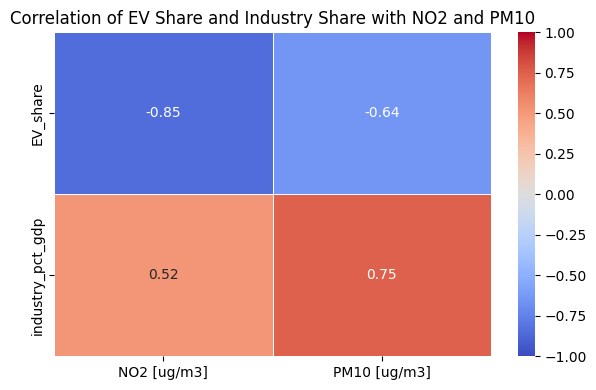

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data from 2002 onward
filtered_df = merged_df[merged_df['year'] >= 2002]

# Select relevant columns
cols = ['EV_share', 'industry_pct_gdp', 'NO2 [ug/m3]', 'PM10 [ug/m3]']
corr_matrix = filtered_df[cols].corr()

# Focused correlation matrix
focused_corr = corr_matrix.loc[['EV_share', 'industry_pct_gdp'], ['NO2 [ug/m3]', 'PM10 [ug/m3]']]

# Plot heatmap with scale fixed from -1 to 1
plt.figure(figsize=(6, 4))
sns.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation of EV Share and Industry Share with NO2 and PM10')
plt.tight_layout()
plt.show()


In [33]:
!pip install ace-tools

In [34]:
import statsmodels.api as sm
import pandas as pd

# Dependent variables
dependent_vars = ['NO2 [ug/m3]', 'PM10 [ug/m3]', 'CO2']

# Store results
univariate_results = []
multivariate_results = []

for y_var in dependent_vars:
    df_clean = merged_df[[y_var, 'EV_share', 'industry_pct_gdp']].dropna()
    Y = df_clean[y_var]

    # Univariate: EV_share
    X1 = sm.add_constant(df_clean['EV_share'])
    model1 = sm.OLS(Y, X1).fit()
    univariate_results.append({
        'Y': y_var,
        'Predictor': 'EV_share',
        'R2': model1.rsquared,
        'coef': model1.params['EV_share'],
        'p-value': model1.pvalues['EV_share']
    })

    # Univariate: industry_pct_gdp
    X2 = sm.add_constant(df_clean['industry_pct_gdp'])
    model2 = sm.OLS(Y, X2).fit()
    univariate_results.append({
        'Y': y_var,
        'Predictor': 'industry_pct_gdp',
        'R2': model2.rsquared,
        'coef': model2.params['industry_pct_gdp'],
        'p-value': model2.pvalues['industry_pct_gdp']
    })

    # Multivariate: both
    X3 = sm.add_constant(df_clean[['EV_share', 'industry_pct_gdp']])
    model3 = sm.OLS(Y, X3).fit()
    multivariate_results.append({
        'Y': y_var,
        'R2': model3.rsquared,
        'Adj_R2': model3.rsquared_adj,
        'EV_share_coef': model3.params['EV_share'],
        'EV_share_p': model3.pvalues['EV_share'],
        'Industry_coef': model3.params['industry_pct_gdp'],
        'Industry_p': model3.pvalues['industry_pct_gdp']
    })

# Create dataframes
univariate_df = pd.DataFrame(univariate_results)
multivariate_df = pd.DataFrame(multivariate_results)

# Display results
print("📘 Univariate OLS Results")
display(univariate_df.round(3))

print("\n📗 Multivariate OLS Results")
display(multivariate_df.round(3))


📘 Univariate OLS Results


,Y,Predictor,R2,coef,p-value
0,NO2 [ug/m3],EV_share,0.725,-953.825,0.000
1,NO2 [ug/m3],industry_pct_gdp,0.273,6.196,0.010
2,PM10 [ug/m3],EV_share,0.412,-603.740,0.002
3,PM10 [ug/m3],industry_pct_gdp,0.556,7.769,0.000
4,CO2,EV_share,0.747,-399.391,0.000
5,CO2,industry_pct_gdp,0.345,2.870,0.003



📗 Multivariate OLS Results


,Y,R2,Adj_R2,EV_share_coef,EV_share_p,Industry_coef,Industry_p
0,NO2 [ug/m3],0.829,0.812,-861.780,0.0,3.948,0.002
1,PM10 [ug/m3],0.803,0.782,-478.469,0.0,6.667,0.000
2,CO2,0.895,0.885,-354.006,0.0,1.946,0.000


In [40]:
# Dependent variables
dependent_vars = ['NO2 [ug/m3]', 'PM10 [ug/m3]', 'CO2']

# Store results
univariate_results = []
multivariate_results = []

for y_var in dependent_vars:
    df_clean = merged_df[[y_var, 'EV_share', 'industry_pct_gdp','avg_temp', 'log_population']].dropna()
    Y = df_clean[y_var]

    # Univariate: EV_share
    X1 = sm.add_constant(df_clean['EV_share'])
    model1 = sm.OLS(Y, X1).fit()
    univariate_results.append({
        'Y': y_var,
        'Predictor': 'EV_share',
        'R2': model1.rsquared,
        'coef': model1.params['EV_share'],
        'p-value': model1.pvalues['EV_share']
    })

    # Univariate: industry_pct_gdp
    X2 = sm.add_constant(df_clean['industry_pct_gdp'])
    model2 = sm.OLS(Y, X2).fit()
    univariate_results.append({
        'Y': y_var,
        'Predictor': 'industry_pct_gdp',
        'R2': model2.rsquared,
        'coef': model2.params['industry_pct_gdp'],
        'p-value': model2.pvalues['industry_pct_gdp']
    })

    # Multivariate: EV_share + industry_pct_gdp + log_population + avg_temp
    X3 = sm.add_constant(df_clean[['EV_share', 'log_population', 'industry_pct_gdp', 'avg_temp']])
    model3 = sm.OLS(Y, X3).fit()
    multivariate_results.append({
        'Y': y_var,
        'R2': model3.rsquared,
        'Adj_R2': model3.rsquared_adj,
        'EV_share_coef': model3.params['EV_share'],
        'EV_share_p': model3.pvalues['EV_share'],
        'Industry_coef': model3.params['industry_pct_gdp'],
        'Industry_p': model3.pvalues['industry_pct_gdp'],
        'avg_temp_coef': model3.params['avg_temp'],
        'avg_temp_p': model3.pvalues['avg_temp'],
        'log_population_coef': model3.params['log_population'],
        'log_population_p': model3.pvalues['log_population']
    })

# Create dataframes
univariate_df = pd.DataFrame(univariate_results)
multivariate_df = pd.DataFrame(multivariate_results)

# Display results
print("📘 Univariate OLS Results")
display(univariate_df.round(3))

print("\n📗 Multivariate OLS Results")
display(multivariate_df.round(3))

📘 Univariate OLS Results


,Y,Predictor,R2,coef,p-value
0,NO2 [ug/m3],EV_share,0.725,-953.825,0.000
1,NO2 [ug/m3],industry_pct_gdp,0.273,6.196,0.010
2,PM10 [ug/m3],EV_share,0.412,-603.740,0.002
3,PM10 [ug/m3],industry_pct_gdp,0.556,7.769,0.000
4,CO2,EV_share,0.747,-399.391,0.000
5,CO2,industry_pct_gdp,0.345,2.870,0.003



📗 Multivariate OLS Results


,Y,R2,Adj_R2,EV_share_coef,EV_share_p,Industry_coef,Industry_p,avg_temp_coef,avg_temp_p,log_population_coef,log_population_p
0,NO2 [ug/m3],0.911,0.891,-334.269,0.055,-1.334,0.411,-0.273,0.842,-93.312,0.001
1,PM10 [ug/m3],0.924,0.905,106.402,0.470,0.796,0.579,0.273,0.806,-112.942,0.000
2,CO2,0.977,0.972,-128.870,0.001,-0.267,0.429,-0.319,0.269,-38.155,0.000
